# Terry Stops #

For a long time now, there has been a rise in tension between law enforcement and citizens. It is believed that alot of it stems from the precedent Supreme Court case of [Terry v. Ohio](https://www.oyez.org/cases/1967/67). This case was a landmark case that found that a police officer was not in violation of the "unreasonable search and seizure" clause of the Fourth Amendment, even though he stopped and frisked a couple of suspects only because their behavior was suspicious. Thus was born the notion of "reasonable suspicion", according to which an agent of the police may e.g. temporarily detain a person, even in the absence of clearer evidence that would be required for full-blown arrests etc. Terry Stops are stops made of suspicious drivers.


Through Seattle's Open Data Program, I was able to download the Terry Stop Data from the past few years, and analyze the data with the purpose of creating a model that would be able to predict whether an arrest was made after a Terry Stop had occurred. 


The following code follows the methods used to clean up dataset and fit it into our models and evaluate its performance.

Let's import all the necessary libraries to analyze the data. The necessary libraries and other functions can be found in the file named `functions.py`.

In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
import sys
import os
path_to_src = os.path.join('../', 'references')
sys.path.insert(0, path_to_src)
from functions import *
%matplotlib inline

Read the data and look at the first rows of data.

In [45]:
df = pd.read_csv('../data/Terry_Stops.csv')
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,...,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,-,-1,20150000001463,28806,Field Contact,None,5670,1965,M,White,...,07:59:00,-,-,-,NaN,N,N,-,-,-
2,-,-1,20150000001516,29599,Field Contact,None,4844,1961,M,White,...,19:12:00,-,-,-,NaN,N,-,-,-,-
3,-,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,...,04:55:00,-,-,-,NaN,N,N,-,-,-
4,-,-1,20150000001739,33155,Field Contact,None,6973,1977,M,White,...,00:41:00,-,-,-,NaN,N,N,-,-,-


At first glance we can see that we have some missing data in the Subjet Age Group as well as Initial Call Type. Also some NaN values on Officer Squad. Let's dig in a little more to view what we hyave to work with.

In [46]:
print(df.isna().sum())
print('----------------------------------------------------------------------------')
print(df.info())

Subject Age Group             0
Subject ID                    0
GO / SC Num                   0
Terry Stop ID                 0
Stop Resolution               0
Weapon Type                   0
Officer ID                    0
Officer YOB                   0
Officer Gender                0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender      0
Reported Date                 0
Reported Time                 0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad               604
Arrest Flag                   0
Frisk Flag                    0
Precinct                      0
Sector                        0
Beat                          0
dtype: int64
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47213 entries, 0 to 47212
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------

It appears as though we have a lot of information to work with and the only feature that has missing data is the `Officer Squad` feature.

Let's cleanup the names of the columns to make it easier to code.

In [47]:
list(df.columns)

['Subject Age Group',
 'Subject ID',
 'GO / SC Num',
 'Terry Stop ID',
 'Stop Resolution',
 'Weapon Type',
 'Officer ID',
 'Officer YOB',
 'Officer Gender',
 'Officer Race',
 'Subject Perceived Race',
 'Subject Perceived Gender',
 'Reported Date',
 'Reported Time',
 'Initial Call Type',
 'Final Call Type',
 'Call Type',
 'Officer Squad',
 'Arrest Flag',
 'Frisk Flag',
 'Precinct',
 'Sector',
 'Beat']

In [48]:
update_col_names = {'Subject Age Group':'sub_age_group', 'Subject ID':'sub_id', 
                    'GO / SC Num':'go_num_sc_num','Terry Stop ID':'terryS_id', 
                    'Stop Resolution':'stop_resolution','Weapon Type':'weapon_type',
                    'Officer ID':'officer_id','Officer YOB':'officer_YOB',
                    'Officer Gender':'officer_gender','Officer Race':'officer_race',
                    'Subject Perceived Race':'sub_perceived_race','Subject Perceived Gender':'sub_perceived_gender',
                    'Reported Date':'reported_date','Reported Time':'reported_time',
                    'Initial Call Type':'initial_calltype','Final Call Type':'final_calltype',
                    'Call Type':'call_type','Officer Squad':'officer_squad',
                    'Arrest Flag':'arrest_flag','Frisk Flag':'frisk_flag',
                    'Precinct':'precinct','Sector':'sector','Beat':'beat'}
df.rename(columns=update_col_names, inplace=True)
df.head()

,sub_age_group,sub_id,go_num_sc_num,terryS_id,stop_resolution,weapon_type,officer_id,officer_YOB,officer_gender,officer_race,...,reported_time,initial_calltype,final_calltype,call_type,officer_squad,arrest_flag,frisk_flag,precinct,sector,beat
0,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,...,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,-,-1,20150000001463,28806,Field Contact,None,5670,1965,M,White,...,07:59:00,-,-,-,NaN,N,N,-,-,-
2,-,-1,20150000001516,29599,Field Contact,None,4844,1961,M,White,...,19:12:00,-,-,-,NaN,N,-,-,-,-
3,-,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,...,04:55:00,-,-,-,NaN,N,N,-,-,-
4,-,-1,20150000001739,33155,Field Contact,None,6973,1977,M,White,...,00:41:00,-,-,-,NaN,N,N,-,-,-


Much better!

## Creating Features from the Data ##

Part of the data that the columns tell us is the officers year of birth, but it does not tell us the officer's age. It seems more reasonable to have an age feature for a cop to help with our prediction model. 

We will use the officer's year of birth and the date that the reported stop was made to figure out the age of the officer when he made the stop.

In [49]:
df.officer_YOB.sort_values(ascending=True)

27062    1900
1058     1900
25205    1900
1080     1900
46088    1900
         ... 
43572    1998
38661    1998
36743    1998
37464    1998
27451    1998
Name: officer_YOB, Length: 47213, dtype: int64

In [50]:
for x in range(len(df.reported_date)):
    df.reported_date = df.reported_date[x][0:10]
    df['year_reported'] = df.reported_date[x][0:4]

In [51]:
df['officer_age'] = df.year_reported.astype(int) - df.officer_YOB

In [52]:
df['officer_age'].sort_values(ascending=False)

35978    115
36308    115
24902    115
38084    115
38025    115
        ... 
11461     17
27451     17
37464     17
12988     17
12044     17
Name: officer_age, Length: 47213, dtype: int64

It is highly unlikely that there were 115 year old officers doing stops. Or have officers younger than 21 years. We will filter out those along with officers that are around the 80 year old mark.

In [53]:
df = df[df.officer_age >= 21]

In [54]:
df = df[df.officer_age <= 80]

In [55]:
df['officer_age'].sort_values(ascending=False)

5328     69
3869     69
182      67
39288    67
39353    67
         ..
27709    21
45996    21
37710    21
9224     21
24642    21
Name: officer_age, Length: 44907, dtype: int64

Much better and reasonable.

Now let's categorize the feature `weapon_type` by replacing no weapons found values as 0 and weapons found as 1.

In [56]:
df.weapon_type = df.weapon_type.astype(str)
df.weapon_type.unique()

array(['None', 'Firearm Other', 'Lethal Cutting Instrument', 'Handgun',
       '-', 'Club, Blackjack, Brass Knuckles',
       'Knife/Cutting/Stabbing Instrument', 'Other Firearm', 'Rifle',
       'Fire/Incendiary Device', 'Blunt Object/Striking Implement',
       'Firearm (unk type)', 'Mace/Pepper Spray', 'None/Not Applicable',
       'Club', 'Firearm', 'Taser/Stun Gun', 'Shotgun', 'Brass Knuckles',
       'Automatic Handgun', 'Blackjack',
       'Personal Weapons (hands, feet, etc.)'], dtype=object)

In [57]:
list_to_replace_weapons = ['1', '-', 'None', 'Knife/Cutting/Stabbing Instrument',
       'Other Firearm', 'Rifle', 'Fire/Incendiary Device',
       'Blunt Object/Striking Implement', 'Firearm Other',
       'Lethal Cutting Instrument', 'Handgun', 'Firearm (unk type)',
       'Mace/Pepper Spray', 'None/Not Applicable', 'Club',
       'Club, Blackjack, Brass Knuckles', 'Firearm', 'Taser/Stun Gun',
       'Shotgun', 'Brass Knuckles', 'Automatic Handgun', 'Blackjack',
       'Personal Weapons (hands, feet, etc.)']

df.weapon_type.replace(to_replace='None',value=0, inplace=True)
df.weapon_type.replace(to_replace=list_to_replace_weapons, value=1,inplace=True)

In [58]:
df.weapon_type.head()

0    0
1    0
2    0
3    0
4    0
Name: weapon_type, dtype: int64

In [59]:
df.weapon_type.value_counts()

0    32051
1    12856
Name: weapon_type, dtype: int64

## Rest of the columns ##

Because most of the features that we are going to be using for our model are categorical, we are going to set the `datatype` as `category`.

In [60]:
category_features = ['sub_age_group','officer_gender','officer_race','sub_perceived_race','sub_perceived_gender',
                     'frisk_flag','call_type']

In [61]:
for x in category_features:
    df[x] = df[x].astype('category').cat.as_ordered()

In [62]:
df[category_features].dtypes

sub_age_group           category
officer_gender          category
officer_race            category
sub_perceived_race      category
sub_perceived_gender    category
frisk_flag              category
call_type               category
dtype: object

Great! Now let's get the target column with the proper values.

## Encoding target column ##

Since the `stop_resolution` is our target column, we will encode it to determine whether a major consequence or arrest was made by binning said values to 1 and the rest of the values as 0.

In [63]:
df.stop_resolution.value_counts()

Field Contact               17808
Offense Report              15151
Arrest                      11059
Referred for Prosecution      717
Citation / Infraction         172
Name: stop_resolution, dtype: int64

In [64]:
new_target_values = {'Arrest':1,
                     'Field Contact':0,
                     'Citation / Infraction':0,
                     'Offense Report':1,
                     'Referred for Prosecution':1}

In [65]:
df['stop_resolution'].replace(new_target_values, inplace=True)

## Splitting the data ##

It's time to split the data! We set a variable named `x_feats` as the `X` variable and the `stop_resolution` column as our target column. Since we have set the values of our target to bool -meaning 1 if an arrest was made and 0 if there was not an arrest made- this makes our problem/model follow a binary classification process.

In [66]:
x_feats = ['sub_age_group','weapon_type','officer_gender','officer_race','sub_perceived_race',
           'sub_perceived_gender','frisk_flag','call_type','officer_age']

In [67]:
X = df[x_feats]
y = df['stop_resolution']

In [68]:
X.weapon_type = X.weapon_type.astype(bool)

/Users/edgarbarron/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


We do 2 train splits in order to have a piece of the data that we don't touch at all. In the mean time we will be concentrating our learning models on the X_train, X_test, y_train, y_test

In [69]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X,y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train_all, y_train_all, random_state=42)

In order for our models to be read by the algorithms it is necessarily to properly process the data. For this our X_train and X_test will be processed with `OneHotEncoder`.

In [70]:
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_ohe = ohe.fit_transform(X_train)
X_test_ohe = ohe.transform(X_test)

We want to see how the model performs at its base and without any changes to hyperparameters or regularisation.

In [71]:
logreg = LogisticRegression()

In [72]:
model_1 = logreg.fit(X_train_ohe, y_train)

/Users/edgarbarron/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
y_hat_train = logreg.predict(X_train_ohe)
y_hat_test = logreg.predict(X_test_ohe)

In [74]:
scores(y_train, y_hat_train,y_test,y_hat_test)

F1 score for training data: 0.8802693777115845
-------------------------------------------
F1 score for testing data: 0.8781435090785512
-------------------------------------------
Recall score for training data: 0.9016980631467233
-------------------------------------------
Recall score for testing data: 0.8972222222222223
-------------------------------------------
Precision score for training data: 0.8598355471220747
-------------------------------------------
Precision score for testing data: 0.8598592888381822


Great results from our first model. Our F1 metric shows the average metric between recall and precision, with a score of .87. Because of the combined score, it is helpful to see how our recall and precision score does overall.

Both our recall and precision are high with our precision being the one score that is slightly lower. Since our objective is to look at how accurately we can predict an arrest, recall score is our best indicator. Though, for the sake of this project, we will focus on the F1 score because it gives us the overall score of the model.

Now, let's visualize the errors with a confusion matrix.

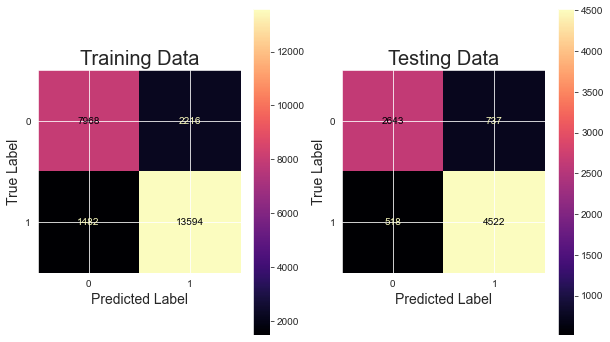

In [75]:
plot_cf(logreg,X_train_ohe,y_train,X_test_ohe,y_test,'base_model_cf')

We can illustrate it even further by looking at the true positive rate against the false positive rate. We do this by getting our ROC and AUC score and we can go even further by illustriting it.

/Users/edgarbarron/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.9014156863435709


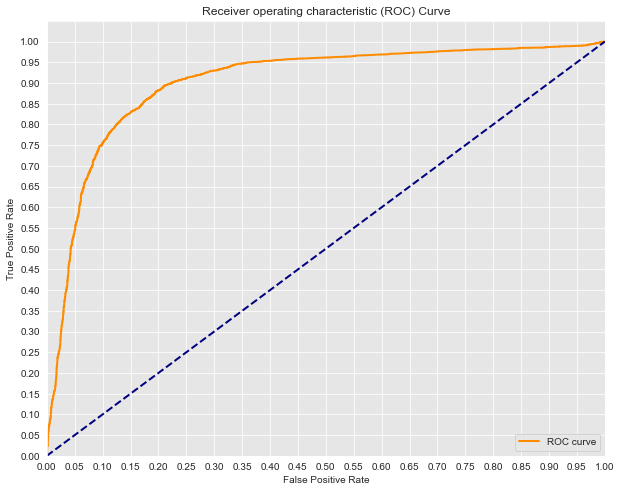

In [76]:
roc_auc_plot(X_train_ohe, y_train, X_test_ohe, y_test, logreg,'ROC_curve_1')

We can see that we get a very solid score on the AUC/ROC curve test. With 90% of our data being predicted correctly.

## Model 2 - Adding Synthetic Data ##

Let's see if adding synthetic data to the model will give us a better score overall than what we already have.

In [77]:
smote = SMOTE()
X_train_resampled, y_train_resampled  = smote.fit_sample(X_train_ohe, y_train)

In [78]:
print(pd.Series(y_train_resampled).value_counts())

1    15076
0    15076
Name: stop_resolution, dtype: int64


Now let's fit our model.

In [79]:
model_2 = logreg.fit(X_train_resampled, y_train_resampled)

/Users/edgarbarron/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Let's get our predictions based on the model.

In [80]:
y_hat_train2 = model_2.predict(X_train_resampled)
y_hat_test2 = model_2.predict(X_test_ohe)

In [81]:
scores(y_train_resampled, y_hat_train2, y_test,y_hat_test2)

F1 score for training data: 0.8506429277942632
-------------------------------------------
F1 score for testing data: 0.8654332221211202
-------------------------------------------
Recall score for training data: 0.8556646325285222
-------------------------------------------
Recall score for testing data: 0.8492063492063492
-------------------------------------------
Precision score for training data: 0.8456798216861151
-------------------------------------------
Precision score for testing data: 0.8822923108637394


We have slightly worse perfoming model with the synthetic data. All of the scores, especially our target -F1 Score- suffered.

Let's see our errors using the confusion matrix.

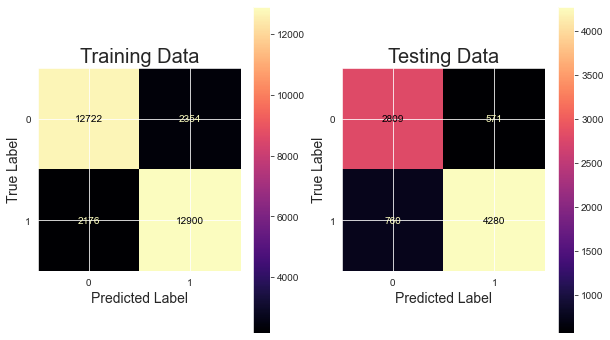

In [82]:
plot_cf(logreg,X_train_resampled,y_train_resampled,X_test_ohe,y_test,'model_2_cf')
#plt.savefig('../images/model_2_cf')

Let's visualize and calculate the AUC/ROC.

/Users/edgarbarron/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.901281082699352


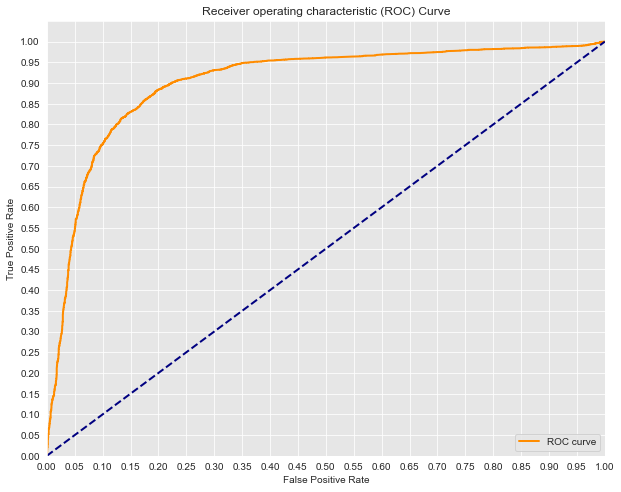

In [83]:
roc_auc_plot(X_train_resampled, y_train_resampled,X_test_ohe,y_test, model_2,'ROC_curev_model_2_cf')
# plt.savefig('../images/ROC_curev_model_2_cf')

Our model still predicts 90% of our targets correctly. However, as we saw with the scores. Our model still is suffering in precision and recall.

## Model 3 - L1 penalty ##

By default, the object LogisticRegression has the penalty enabled to `l2`, this time we will change it to `l1`, to see if we can improve our model performance compared to our previous -synthetically injected- model.

In [84]:
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear')

In [85]:
model_3 = logreg_l1.fit(X_train_resampled, y_train_resampled)

In [86]:
y_hat_train3 = model_3.predict(X_train_resampled)
y_hat_test3 = model_3.predict(X_test_ohe)

In [87]:
scores(y_train_resampled,y_hat_train3,y_test,y_hat_test3)

F1 score for training data: 0.8508156203657935
-------------------------------------------
F1 score for testing data: 0.8660064672594987
-------------------------------------------
Recall score for training data: 0.8562616078535421
-------------------------------------------
Recall score for testing data: 0.8501984126984127
-------------------------------------------
Precision score for training data: 0.8454384701028227
-------------------------------------------
Precision score for testing data: 0.8824135090609555


Overall, a negligible change in the scores of our evaluators. Our F1 Score did not improve whatsoever nor the rest of the evaluation metrics.

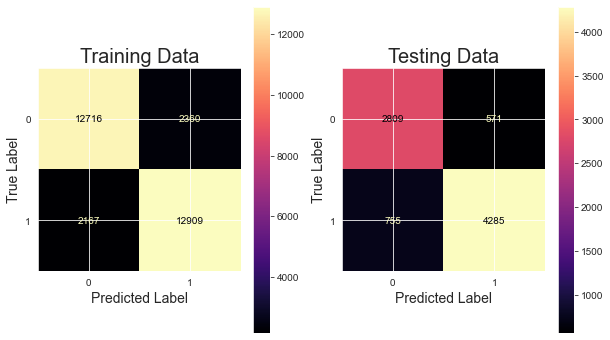

In [88]:
plot_cf(logreg_l1, X_train_resampled, y_train_resampled,X_test_ohe,y_test,'model_3_cf')
#plt.savefig('../images/model_3_cf')

Visualizing with ROC/AUC.

AUC: 0.901254255893679


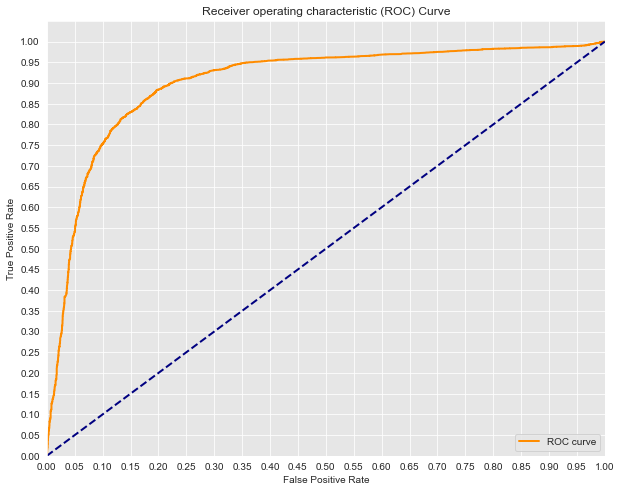

In [89]:
roc_auc_plot(X_train_resampled, y_train_resampled, X_test_ohe, y_test, model_3,'ROC_curve_model_3_cf')
#plt.savefig('../images/ROC_curve_model_3_cf')

Again, no change.

## Model 4 - C regularization ##

Let's create a list with values that are smaller than one that we can loop over to see if it can improve the performatnce of our model.

In [90]:
c_values = [1e-1,1e-2,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10]

In [91]:
for x in c_values:
    logreg_c = LogisticRegression(C = x)
    model_4 = logreg_c.fit(X_train_resampled,y_train_resampled)
    y_hat_train4 = model_4.predict(X_train_resampled)
    y_hat_test4 = model_4.predict(X_test_ohe)
    print('C-value: {}'.format(x))
    print('____________')
    scores(y_train_resampled, y_hat_train4, y_test, y_hat_test4)
    
    print('∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆')

C-value: 0.1
____________
F1 score for training data: 0.8509376132880729
-------------------------------------------
F1 score for testing data: 0.8663975782038346
-------------------------------------------
Recall score for training data: 0.8563279384452109
-------------------------------------------
Recall score for testing data: 0.8517857142857143
-------------------------------------------
Precision score for training data: 0.8456147245693325
-------------------------------------------
Precision score for testing data: 0.8815195071868583
∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆∆
C-value: 0.01
____________
F1 score for training data: 0.8502535579911663
-------------------------------------------
F1 score for testing data: 0.8694603557431414
-------------------------------------------
Recall score for training data: 0.8618997081453966
-------------------------------------------
Recall score for testing data: 0.8583333333333333
-------------------------------------------
Precisi

It seems that changing the value of C to 1e-1 does marginally improve the F1 score without deviating as much from the training data.

Now let's move on to class weights to check on how it affects our model.

LogisticRegression(C=0.01, fit_intercept=False)
AUC for None: 0.9015342056447826
-------------------------------------------------------------------------------------
LogisticRegression(C=0.01, class_weight='balanced', fit_intercept=False)
AUC for Balanced: 0.9015342056447826
-------------------------------------------------------------------------------------
LogisticRegression(C=0.01, class_weight={0: 1, 1: 2}, fit_intercept=False)
AUC for 2 to 1: 0.9016046480229173
-------------------------------------------------------------------------------------
LogisticRegression(C=0.01, class_weight={0: 1, 1: 10}, fit_intercept=False)
AUC for 10 to 1: 0.8988812869822486
-------------------------------------------------------------------------------------
LogisticRegression(C=0.01, class_weight={0: 1, 1: 100}, fit_intercept=False)
AUC for 100 to 1: 0.8851155548511317
-------------------------------------------------------------------------------------
LogisticRegression(C=0.01, class_weight={0:

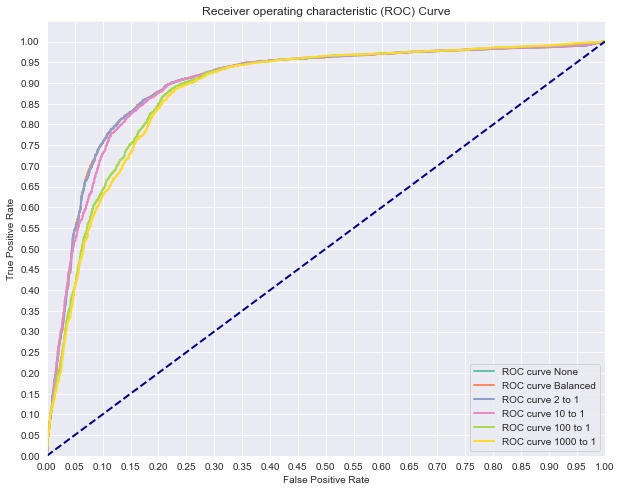

In [92]:
sns.set_style('darkgrid')
# Now let's compare a few different regularization performances on the dataset:
weights = [None, 'balanced', {1:2, 0:1}, {1:10, 0:1}, {1:100, 0:1}, {1:1000, 0:1}]
names = ['None', 'Balanced', '2 to 1', '10 to 1', '100 to 1', '1000 to 1']
colors = sns.color_palette('Set2')

plt.figure(figsize=(10,8))

for n, weight in enumerate(weights):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=1e-2, class_weight=weight, solver='lbfgs')
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(model_log)

    # Predict
    y_hat_test5 = logreg.predict(X_test_ohe)

    y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test_ohe)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------------------------------------')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('../images/ROC_curves_c_values')
plt.show()

Our "best" AUC score is when the weight of the class is at 2 to 1. However, because our model AUC score was barely affected by this weight.

## Model 5 - KNN Model ##

Let's move on to our KNN model and see if we can find a better model for our data.

First we will use `column_selector` to select a specific dataype columns to transform.

In [93]:
int_selector = make_column_selector(dtype_include='int64', dtype_exclude=['category','bool'])
rest_selector = make_column_selector(dtype_include=['category','bool'], dtype_exclude='int64')
all_selector = make_column_selector(dtype_include=['category','bool','int64','string'])

We will now create a preprocessing pipeline to Scale and OneHotEncode preselected columns.

In [94]:
knn_preprocessing = make_column_transformer((StandardScaler(), int_selector),
                                  (OneHotEncoder(handle_unknown='ignore'), rest_selector))

In [95]:
X_train_processed = knn_preprocessing.fit_transform(X_train)
X_test_processed = knn_preprocessing.transform(X_test)

Since we first want to have a base KNN model, our first pipeline will only have the `KNeighborsClassifier()` object.

In [96]:
knn_pipe1 = make_pipeline(KNeighborsClassifier())

Fit the data.

In [97]:
model_5 = knn_pipe1.fit(X_train_processed,y_train)

Generate predictions.

In [98]:
y_hat_train6 = model_5.predict(X_train_processed)
y_hat_test6 = model_5.predict(X_test_processed)

In [99]:
scores(y_train,y_hat_train6,y_test,y_hat_test6)

F1 score for training data: 0.8956018670698835
-------------------------------------------
F1 score for testing data: 0.8621845425867508
-------------------------------------------
Recall score for training data: 0.9036216503051208
-------------------------------------------
Recall score for testing data: 0.8676587301587302
-------------------------------------------
Precision score for training data: 0.8877231851948391
-------------------------------------------
Precision score for testing data: 0.8567789968652038


Very good scores for a base model. However, so far, our base model has had the best overall F1 score.

Let's view its confusion matrix.

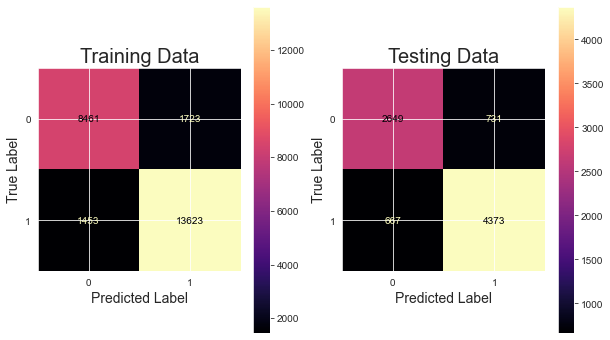

In [100]:
plot_cf(model_5,X_train_processed,y_train,X_test_processed,y_test,'KNN_cf')
#plt.savefig('../images/KNN_cf')

Because this particular dataset does not play well when adding synthetic data, we will skip this step for this model.

Instead, we will look to see what our best K is for the model.

In [101]:
find_best_k(X_train_processed, y_train,X_test_processed,y_test, min_k=1, max_k=50)

Best value for k: 47
F1 Score: 0.8783365570599614


It appears as though the best K is 47.

In [102]:
knn_pipe2 = make_pipeline(KNeighborsClassifier(n_neighbors=47,n_jobs=-1))

In [103]:
model_7 = knn_pipe2.fit(X_train_processed, y_train)

In [104]:
y_hat_train8 = model_7.predict(X_train_processed)
y_hat_test8 = model_7.predict(X_test_processed)

In [105]:
scores(y_train, y_hat_train8,y_test,y_hat_test8)

F1 score for training data: 0.8797674794122397
-------------------------------------------
F1 score for testing data: 0.8783365570599614
-------------------------------------------
Recall score for training data: 0.903488989121783
-------------------------------------------
Recall score for testing data: 0.9009920634920635
-------------------------------------------
Precision score for training data: 0.8572597394423815
-------------------------------------------
Precision score for testing data: 0.8567924528301887


Great model performance. It appears that it is on par with the base LogisticRegression Model.

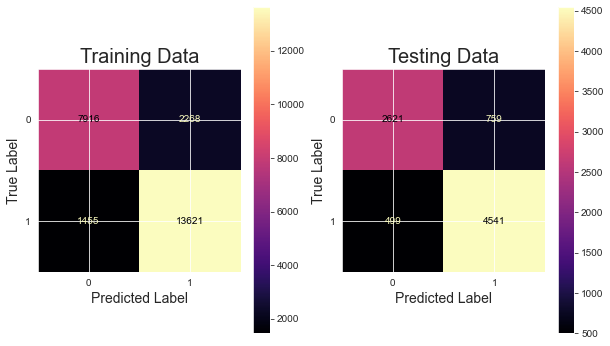

In [106]:
plot_cf(model_7, X_train_processed, y_train, X_test_processed, y_test,'KNN_bestK_cf')
#plt.savefig('../images/KNN_bestK_cf')

## Final Model ##

We have gone through a couple of algorithms and tried to fine tune the hyperparameters to check if we could improve the overall model's performance using the F1 score as the evaluating score.

Based on the results above, it appears as though our best model is the  base Logsitic Regression model. Although it was very similar to our fine tuned KNN model, the Logistic regression model was less resource costly compared to the KNN.

As the final step, let's see how our data from the first `train_test_split` did and then implement the model to all of the data.

In [121]:
preprocessing = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), all_selector), 
                                        remainder='passthrough')

In [122]:
final_pipe = make_pipeline(preprocessing,log_pipe)

In [124]:
X_train_all_ohe = preprocessing.fit_transform(X_train_all)
X_test_all_ohe = preprocessing.transform(X_test_all)

In [111]:
model_all = log_pipe.fit(X_train_all_ohe, y_train_all)

/Users/edgarbarron/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
y_hat_train_all_ohe = model_all.predict(X_train_all_ohe)
y_hat_test_all_ohe = model_all.predict(X_test_all_ohe)

In [113]:
scores(y_train_all,y_hat_train_all_ohe,y_test_all,y_hat_test_all_ohe)

F1 score for training data: 0.8797245860304992
-------------------------------------------
F1 score for testing data: 0.8795189347841649
-------------------------------------------
Recall score for training data: 0.9019188705508053
-------------------------------------------
Recall score for testing data: 0.9019233592717663
-------------------------------------------
Precision score for training data: 0.8585963749940845
-------------------------------------------
Precision score for testing data: 0.8582006146968427


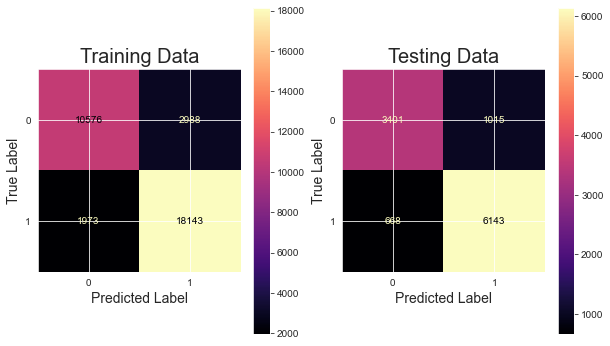

In [114]:
plot_cf(model_all,X_train_all_ohe,y_train_all,X_test_all_ohe, y_test_all,'final_model_tts2')
# plt.savefig('../images/final_model_tts2')

/Users/edgarbarron/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.9024946857066255


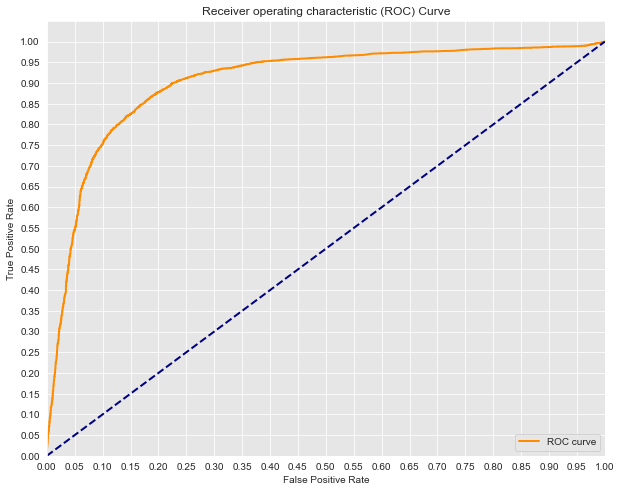

In [115]:
roc_auc_plot(X_train_all_ohe, y_train_all,X_test_all_ohe,y_test_all,model_all,'ROC_curve_final_model')
#plt.savefig('../images/ROC_curve_final_model')

Our evaluation metrics match our untouched train test split. Now let's fit it to all of our data.

In [116]:
X_ohe = preprocessing.fit_transform(X)

In [117]:
final_model = log_pipe.fit(X_ohe,y)

/Users/edgarbarron/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
y_hat_final = final_model.predict(X_ohe)

In [119]:
print('F1 score for final model: {}'.format(f1_score(y, y_hat_final)))
print('Recall score for final model: {}'.format(recall_score(y,y_hat_final)))
print('Precision score for final model: {}'.format(precision_score(y,y_hat_final)))

F1 score for final model: 0.8792906903103229
Recall score for final model: 0.9023285178445426
Precision score for final model: 0.8573999576540334


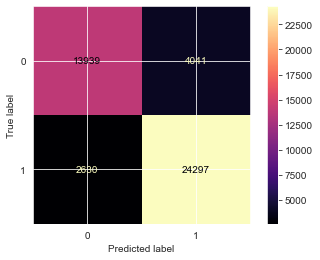

In [120]:
plot_confusion_matrix(final_model, X_ohe, y, cmap=plt.cm.magma)
plt.savefig('../images/full_data_cf')
plt.show()

## Findings ##

**Model Metrics:**
- F1 score for training data: 0.8797245860304992
- F1 score for testing data: 0.8795189347841649

The main metric that we concentrated on was F1 score. We got an overall score of approximately 0.88 which is a great score. On our training/testing data we got a .90 AUC score which is also great, very close to 100% of accurately predicted data in our model.